Número de amostras:  100
Lista de amostras:  [-2.950913051224138, -3.329479947799239, -3.064450524069608, -3.1106765943016663, -3.0759084828348233, -3.086317123143904, -3.0632694887234058, -3.072694861725142, -3.1992869811736933, -3.1197255348611126, -3.0211512136275798, -2.9844639612912234, -2.8838704180438532, -3.073524026416142, -3.189035883938531, -2.964946367313015, -3.101265629143615, -3.639021310554508, -2.5632207279417623, -3.0253327077377894, -3.1285417731014995, -3.1775284758047624, -3.056717168285896, -3.38704515248965, -3.01537350231194, -3.1578300882441757, -2.6759657852299052, -2.625748388131893, -3.097487442629825, -3.5141023346551323, -3.1985442513435918, -2.733220715649181, -3.2473658116866466, -3.3700508871373795, -3.072641518362579, -3.357366089648101, -3.624013627646714, -3.2775073664690737, -2.950150911845961, -2.775926193467539, -3.2999661525227424, -3.049537900573765, -3.1445715027098466, -3.3232660958301254, -3.257513607272251, -3.91480918173617, -3.215765523577

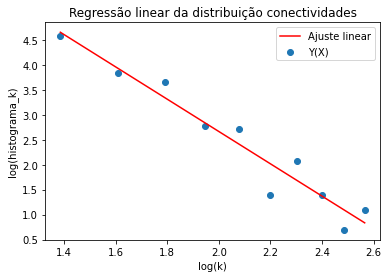

In [5]:
# Geração de amostras para extração de métricas das redes

amostra = 0
amostras_m = []

while amostra < 100:

  # (i) Definição da condição inicial

  N = 250 # Tamanho do sistema
  M_o = 3 # Quantidade de vizinhos que cada novo vértice adicionado à rede terá, ou número de ligações que este novo vértice 
          # deve fazer ao ser adicionado a rede

  import random

  # Criação das listas
  lista_k = [0]*N 
  lista_adj = [0]*N 

  lista_todas_prob = [0]*N
  lista_soma_prob = [0]*N

  # contador
  ite_n = 0

  # Cria uma lista com o tamanho desejado do sistema
  while ite_n < N:
    lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração 
                               # ite_n ([[0],[1],[2],...[N-1]])
    ite_n += 1

  # Contadores
  ite_m = 0
  ite_m2 = 0 

  # Gera a condição inicial (T=0) 
  while ite_m < M_o:
    ite_m2 = ite_m + 1
  
    while ite_m2 < M_o + 1:
      # Atualiza as ligações entre dois vértices a cada iterada 'ite_m'
      lista_adj[ite_m].append(ite_m2)
      lista_adj[ite_m2].append(ite_m) 

      # Atualiza os graus dos vértices que foram ligados a cada iterada 'ite_m'
      lista_k[ite_m] = lista_k[ite_m] + 1
      lista_k[ite_m2] = lista_k[ite_m2] + 1

      ite_m2 += 1
    ite_m += 1

  # Cálcula a probabilidade de conexão associada a cada vértice que já está na rede
  def calcula_prob(ite_n): # O parâmetro recebido 'ite_n' diz a função quandos vértices já fazem parte da rede a cada iterada 
    soma_prob = 0
    soma_lista_k = float(sum(lista_k)) # Denominador da equação 3.1

    ite_p = 0 # contador

    while ite_p < ite_n: # O percorrimento desse 'while' aumenta a cada iterada a medida que o variável associada ao tamanho da rede atual (ite_n) aumenta
      prob = float(lista_k[ite_p])/soma_lista_k # Equação 3.1 (conectividade Ki). É atualizada a cada iterada 'ite_p' para cada vértice presente na rede atualmente
      lista_todas_prob[ite_p] = prob # Armazena a probabilidade de conexão (conectividade Ki) do vértice na posição 'ite_p'
      soma_prob = soma_prob + prob
      lista_soma_prob[ite_p] = soma_prob # Armazena a soma das probabilidades atual para cada vértice na posição 'ite_p'. A soma acumulada aumenta com ite_p, 
                                       # de maneira que menores índices de probabilidade acumulada (posições iniciais em 'lista_todas_prob[]) favoreçam os vértices iniciais
      ite_p += 1                         # a receberem ligação primeiro (ligação pref) a medida que a 'lista_soma_prob' é percorrida na função 'encontra_v2'

  # Função que procura com quem o vértice que está entrando na rede irá se conectar. 
  # É esta função que caracteriza a regra da ligação preferencial
  def encontra_v2(ite_n, prob_v2):
    ite_n2 = 0 # Contador para indexar a posição na lista 'lista_soma_prob'

    while ite_n2 < ite_n: # Percorre no máximo o tamanho da lista de acordo com a quantidade atual de elementos (ite_n)
      if lista_soma_prob[ite_n2] >= prob_v2: # ALTERAR ESTA CONDIÇÃO. PERCORRER A LISTA SOMA_PROB OU LISTA_TODAS_PROB POR ÍNDICES DE MAIOR PROBEBILIDADE PRIMEIRO, E NAO ordenado
        return ite_n2
      ite_n2 += 1
                                     
  # (ii) iteração das regras de conexão

  # Passo (2) - laço principal

  ite_n = M_o + 1

  while ite_n < N:
    v1 = ite_n # Vértice que está entrando na rede
    calcula_prob(ite_n) # Calcula a probabilidade associada a cada vértice que está na rede de receber ligações do vértice que entrou a cada iterada e armazena esses valores
  
    ite_m = 0 # Contador

    while ite_m < M_o: # Bloco executado sempre M_o vezes 
      prob_v2 = random.random() # Número aleatório entre 0-1 (para comparação com v2 na função 'encontra_v2')
      v2 = encontra_v2(ite_n, prob_v2) # Vértice da rede escolhido através da execução da função 'encontra_v2' para receber ligação do vértice que está entrando (v1)

      while v2 in lista_adj[v1]: # Este laço evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si
        prob_v2 = random.random()
        v2 = encontra_v2(ite_n, prob_v2)

      lista_adj[v1].append(v2) # Adiciona na posição [v1] (que é uma lista por sí só dentro da lista_adj[]) o valor v2
      lista_adj[v2].append(v1) # Mesmo processo acima, porém, ao contrário
  
    # Atualiza os gráus dos vértices em questão nas posições v1 e v2
      lista_k[v1] = lista_k[v1] + 1
      lista_k[v2] = lista_k[v2] + 1

      ite_m += 1
    ite_n += 1

  # Passo (3) - Extração de dados da rede

  max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
  histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento

  ite_n = 0

  while ite_n < N:
    histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
    ite_n += 1   

  # Plot do histograma
  import math
  import numpy as np
  import matplotlib.pyplot as plt

  k = [] # Lista que armazenara os valores dos graus
  i = 0

  # Este 'for' gera uma lista de graus 'k' em função do tamanho da lista 'histograma_k'
  for i in range(len(histograma_k)): 
    k.append(i + 1) # +1 para sincronizar a lista 'k' com 'histograma_k'
    i += 1

  """Filtragem da lista 'k' e 'histograma_k'
   Necessária para eliminar elementos nulos na lista histograma_k e remover nesses mesmos índices os elementos da lista 'k'.
   Assim, teremos as duas listas apenas com os graus e a quantidades de vértices com tais graus existentes, eliminando valores
   nulos, de maneira a evitar erros na regressão linear."""

  # Convertendo 'k' e 'histograma_k' em um array NumPy. X = k ; Y = histograma_k
  X = np.array(k)
  Y = np.array(histograma_k)

  # Mapeia quais índices em Y possuem valor 0  armazena em 'indexes'. 'indexes' é uma lista que armazena as posições que possuem o valor 0
  indexes = np.where(Y == 0)

  # Remove das listas X e Y os índices que possuem elementos 0 da lista Y. Argumentos da função 'delete(arr, obj, axis)'
  X = np.delete(X, indexes)
  Y = np.delete(Y, indexes)

  X1 = np.log(X)
  Y1 = np.log(Y)

  # 10 primeiros valores
  X = X1[0:10]
  Y = Y1[0:10]

  # Cálculo da regressão linear sem bibliotecas

  media_X = np.mean(X)
  media_Y = np.mean(Y)

  erro_X = X-media_X
  erro_Y = Y-media_Y

  soma_erro_XY = np.sum(erro_X*erro_Y)
  erro_X_quadratico = (X-media_X)**2.0
  soma_erro_X_quadratico = np.sum(erro_X_quadratico)

  m = soma_erro_XY / soma_erro_X_quadratico 
  #print("Coeficiente angular = {:0.2f}".format(m))

  c = media_Y - m*media_X
  #print("Coeficiente linear = {:0.2f}".format(c))

  # Desvio padrão com Numpy

  amostras_m.append(m)

  amostra += 1

print('Número de amostras: ', amostra)
print('Lista de amostras: ', amostras_m)
print('Média: ',np.abs(np.mean(amostras_m)), '\nDesvio Padrão (modelo Barabasi-Albert): ', np.std(amostras_m), '\nVariância: ', np.var(amostras_m))
print('Desvio padrão relativo: ', np.abs((np.std(amostras_m)/(np.mean(amostras_m))) * 100), '%')
print('\n')
reta = m*X+c

plt.scatter(X,Y,label='Y(X)')
plt.plot(X,reta,label='Ajuste linear',color='red')
plt.xlabel('log(k)')
plt.ylabel('log(histograma_k)')
plt.title('Regressão linear da distribuição conectividades')
plt.legend()
plt.show()
